In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import math

df = pd.read_csv("candy_forecast24m.csv")
display(df.head())

,time_series_timestamp,time_series_type,time_series_data,time_series_adjusted_data,standard_error,confidence_level,prediction_interval_lower_bound,prediction_interval_upper_bound,trend,seasonal_period_yearly,seasonal_period_quarterly,seasonal_period_monthly,seasonal_period_weekly,seasonal_period_daily,holiday_effect,spikes_and_dips,step_changes,residual
0,1975-01-01 00:00:00.000000 UTC,history,67.0117,67.011700,2.57121,NaN,NaN,NaN,0.000000,6.821583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.190117
1,1975-02-01 00:00:00.000000 UTC,history,52.6964,55.247832,2.57121,NaN,NaN,NaN,60.293396,-5.045563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.551432
2,1975-03-01 00:00:00.000000 UTC,history,50.6689,44.963101,2.57121,NaN,NaN,NaN,58.390360,-13.427260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.705799
3,1975-04-01 00:00:00.000000 UTC,history,59.7613,51.335783,2.57121,NaN,NaN,NaN,63.042331,-11.706548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.425517
4,1975-05-01 00:00:00.000000 UTC,history,60.8277,59.025512,2.57121,NaN,NaN,NaN,68.870757,-9.845245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.802188


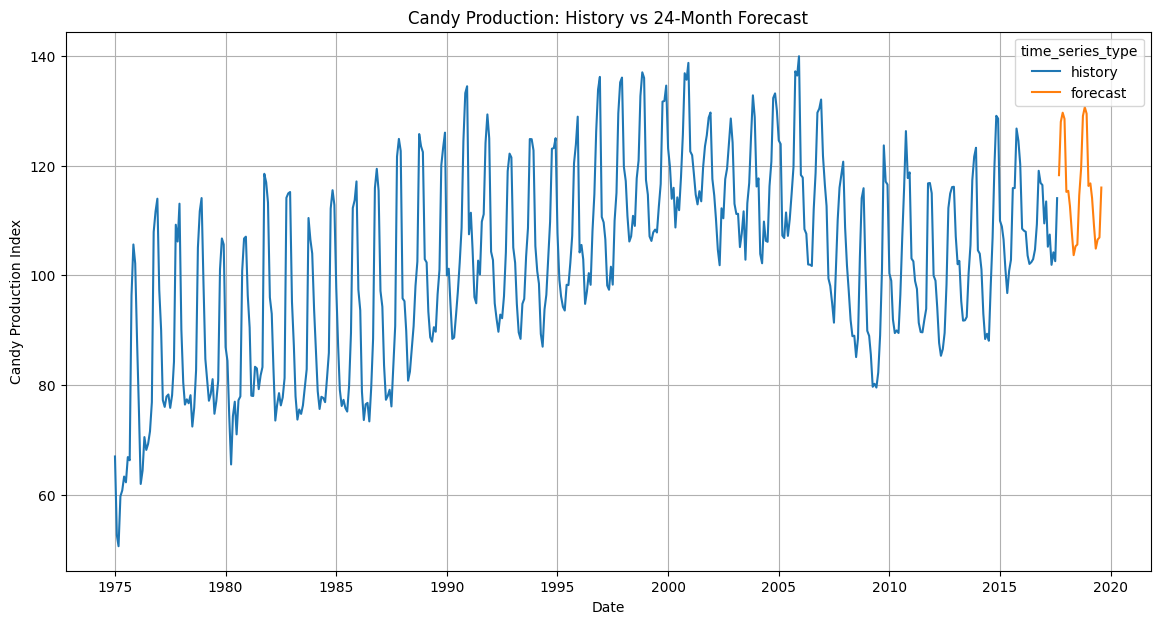

In [2]:
# Chuyển cột thời gian thành datetime
df['time_series_timestamp'] = pd.to_datetime(df['time_series_timestamp'])

# Tạo biểu đồ line plot với seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(
    x='time_series_timestamp',
    y='time_series_data',
    hue='time_series_type',
    data=df,
    palette='tab10'
)

plt.title("Candy Production: History vs 24-Month Forecast")
plt.xlabel("Date")
plt.ylabel("Candy Production Index")
plt.grid(True)
plt.show()

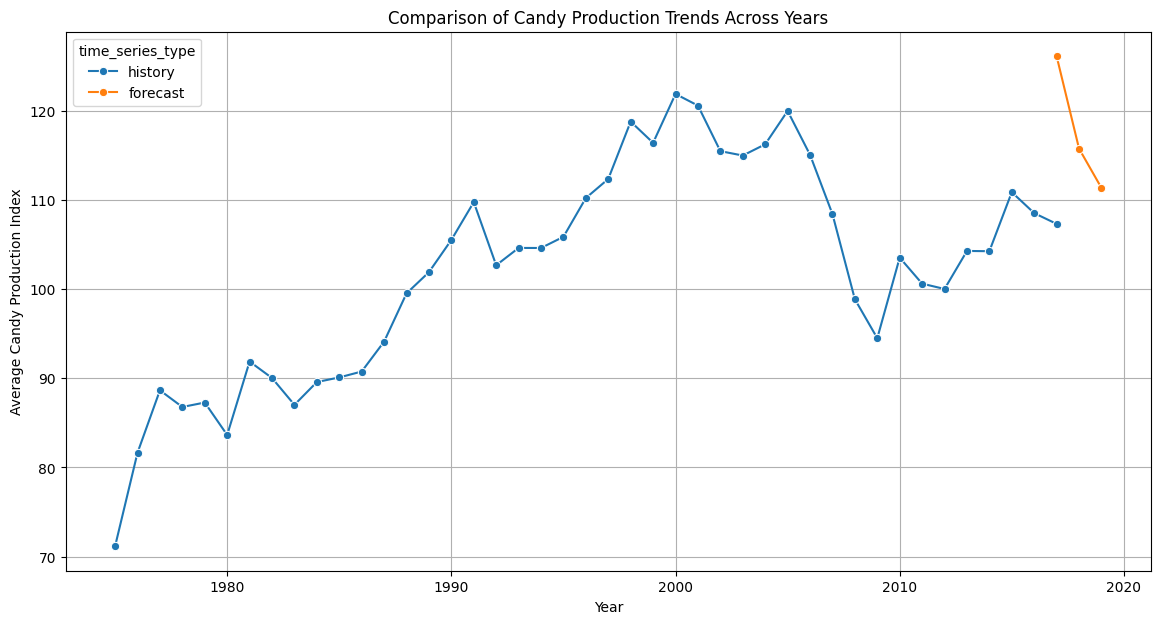

In [3]:
# Thêm cột 'year' để nhóm dữ liệu theo năm
df['year'] = df['time_series_timestamp'].dt.year

# Tính trung bình hàng năm cho dữ liệu sản lượng kẹo
yearly_trends = df.groupby(['year', 'time_series_type'])['time_series_data'].mean().reset_index()

# Vẽ biểu đồ so sánh xu hướng giữa các năm
plt.figure(figsize=(14, 7))
sns.lineplot(
    x='year',
    y='time_series_data',
    hue='time_series_type',
    data=yearly_trends,
    marker='o'
)

plt.title('Comparison of Candy Production Trends Across Years')
plt.xlabel('Year')
plt.ylabel('Average Candy Production Index')
plt.grid(True)
plt.show()

In [ ]:
# Sản lượng trung bình mỗi năm có xu hướng tăng 
# Forecast duy trì mức trung bình cao hơn lịch 

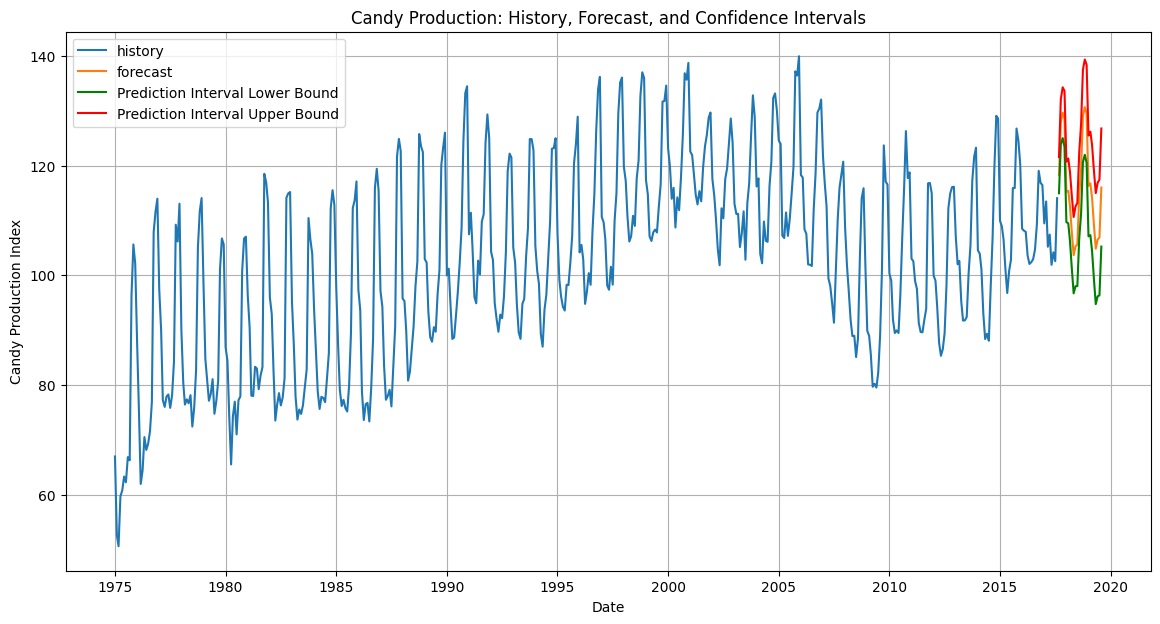

In [4]:
# Convert timestamp to datetime
df['time_series_timestamp'] = pd.to_datetime(df['time_series_timestamp'])

# Create line plot for historical + forecast values
plt.figure(figsize=(14, 7))

# Plot history & forecast values
sns.lineplot(
    data=df,
    x='time_series_timestamp',
    y='time_series_data',
    hue='time_series_type',
    palette='tab10'
)

# Plot lower prediction interval
sns.lineplot(
    data=df,
    x='time_series_timestamp',
    y='prediction_interval_lower_bound',
    color='green',
    label='Prediction Interval Lower Bound'
)

# Plot upper prediction interval
sns.lineplot(
    data=df,
    x='time_series_timestamp',
    y='prediction_interval_upper_bound',
    color='red',
    label='Prediction Interval Upper Bound'
)

plt.title('Candy Production: History, Forecast, and Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Candy Production Index')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Vùng dự báo (lower – upper bound) không quá rộng, mô hình tương đối ổn định.
# Tuy nhiên, khoảng dự báo mở rộng dần theo thời gian --> độ bất định tăng khi dự báo xa 

In [ ]:
bvbbv

In [ ]:
hi
